### Week5_Capstone_Project 2024: Option 2

### Telco Customer Churn Prediction and Retention Strategy
<hr>

#### Develop a machine learning model to predict Telco customer churn (i.e., customers likely to stop using a product or service) and devise strategies to reduce churn rates based on your findings.


### Load Necessary  Libraries to be used.

In [118]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import joblib

import lime

import lime.lime_tabular

import graphviz

import pydotplus

import plotly.graph_objects as go

import lightgbm as lgb

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline


from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate

from statsmodels.stats.outliers_influence import variance_inflation_factor # Handling Multicollinearity

from sklearn.preprocessing import StandardScaler, LabelEncoder 

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import LocalOutlierFactor

from catboost import CatBoostClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from lightgbm import LGBMClassifier

from catboost import CatBoostClassifier

from xgboost import XGBClassifier # Boosting Model Classsification

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.neural_network import MLPClassifier #Neural Networks Classidication


In [2]:
df_churn = pd.read_csv("../Week5_Capstone_Project_2024/Telco-Customer-Churn.csv")

df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Checking the Shape of the Dataset
df_churn.shape

(7043, 21)

In [6]:
# Displaying the contents of the dataframe
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data preprocessing
<hr>

#### 1. Handling Missing Values


In [7]:
# Handling Missing Values

df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.Encoding categorical variables

In [8]:
# We changed the type of the SeniorCitizen variable to be 0

df_churn["SeniorCitizen"] = df_churn["SeniorCitizen"].astype("O")

In [9]:
# We changed the type of the TotalCharges variable to numeric

df_churn["TotalCharges"] = pd.to_numeric(df_churn["TotalCharges"], errors='coerce')

In [10]:
# We onehot encoding  using  Churn variable in the dataset to encode it  from "Yes" and "No" to 1 and 0.

df_churn["Churn"] = df_churn["Churn"].apply(lambda x : 1 if x == "Yes" else 0)


In [15]:
# # We onehot encoding  using  gender  variable in the dataset to encode it  from "Yes" and "No" to 1 and 0.

# churn["gender"] = churn["gender"].apply(lambda x : 1 if x == "Yes" else 0)

In [11]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
# View the information of the dataset
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 3. Detection of Categorical and Numerical Variables
<hr>

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
   
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame 
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [13]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df_churn)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


#### a) Categorical Columns

In [14]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

#### b) Numerical Columns

In [15]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
#Cardnality Column
cat_but_car

['customerID']

#### 4. Checking for Duplicate Values

In [16]:
df_churn.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

# Exploratory Data Analyis (EDA)
<hr>

#### Analyze the data to identify key factors contributing to churn.

#### 1. Analysis of Catergorical Variables


In [20]:
def cat_summery(dataframe, col_name, plot=False):
   
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
        
       

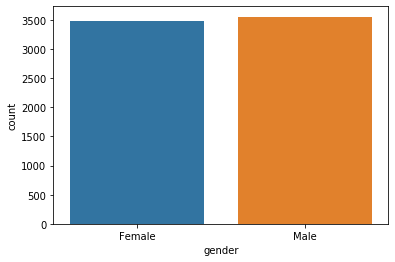

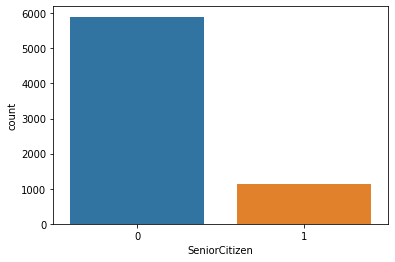

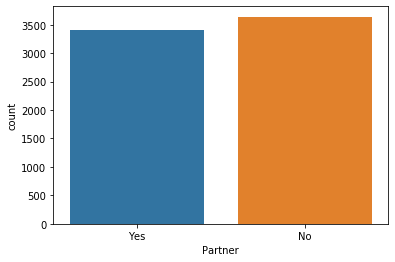

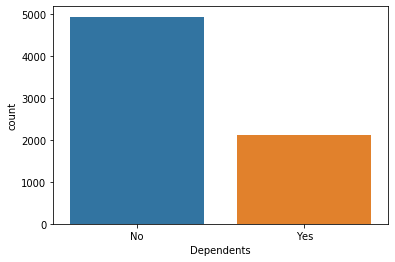

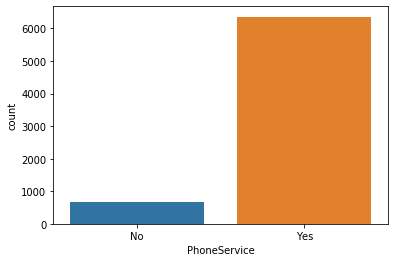

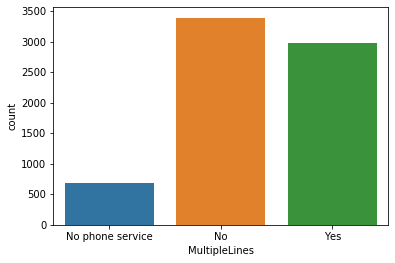

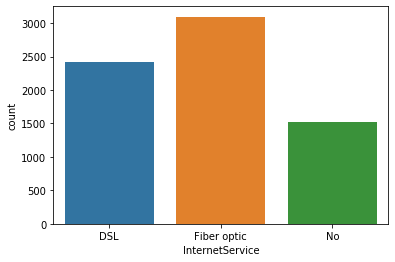

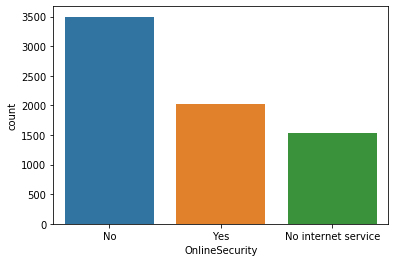

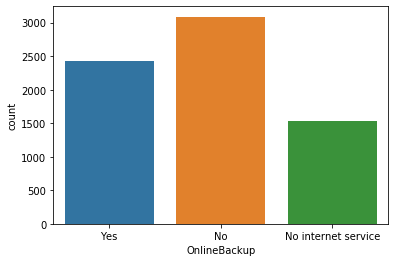

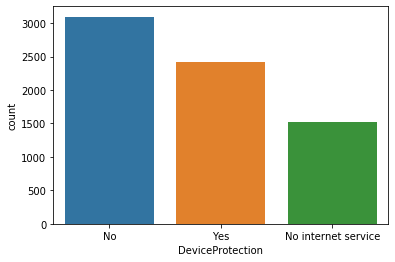

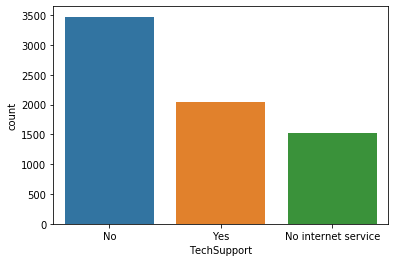

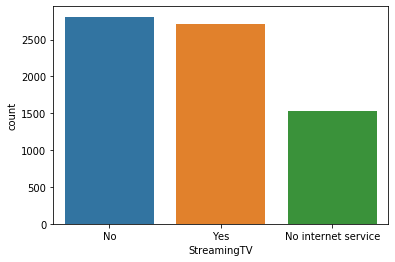

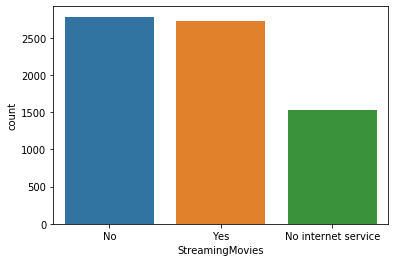

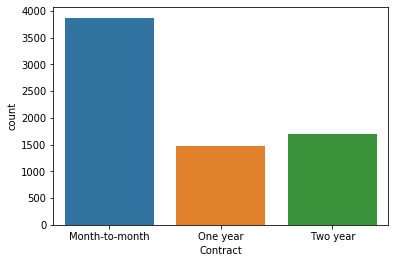

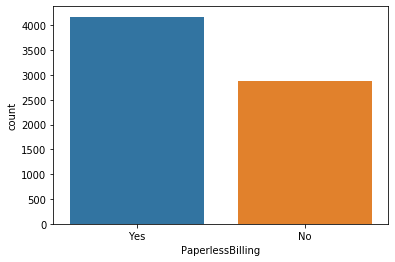

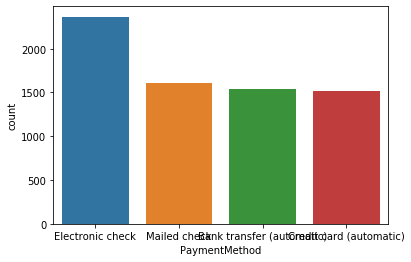

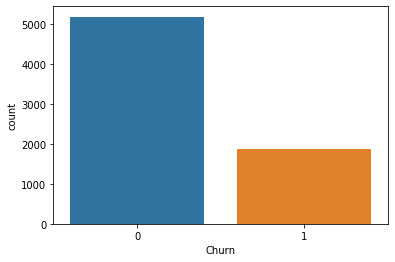

In [21]:
 for col in cat_cols:
            cat_summery(df_churn, col, plot=True)

#### 2.Analysis of Numerical Variables


In [22]:
def num_summary(dataframe, numerical_col, plot=False):
   
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

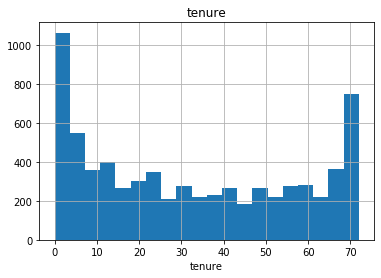

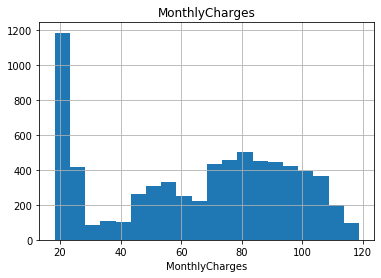

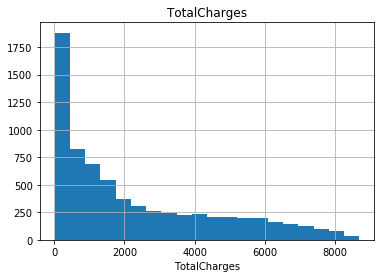

In [21]:
for col in num_cols:
    num_summary(df_churn, col, plot=True)

# Box Plots

In [ ]:
df_num =df_churn.select_dtypes(exclude=[])

In [ ]:
for col in df_num:
    sns.boxplot(x= )

## Correllation Analysis
<hr>

In [21]:
correlation_matrix = df_churn.corr()


In [22]:
correlation_matrix

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.352229,0.193356,-0.199484,1.000000


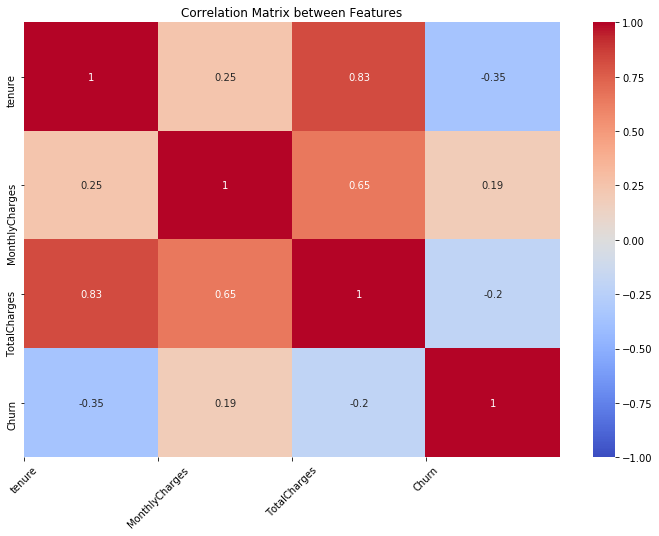

In [25]:

# Heatmap of the correlation matrix
import seaborn as sns


plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, vmin=-1, annot=True, vmax=1, cmap='coolwarm')
plt.title('Correlation Matrix between Features')

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)

plt.show()

# Model Development
<hr>

In [23]:
#create a copy of an existing DataFrame

dff_churn = df_churn.copy()

In [24]:
#filter out the "Churn" column from a list of categorical column. Since Churn is the target variable, 

cat_cols = [col for col in cat_cols if col not in ["Churn"]]

In [25]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### One-Hot-Encoding for Categorical variable

In [26]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [27]:
#Encoding cat_cols from the copied Dataset
dff_churn = one_hot_encoder(dff_churn, cat_cols)

In [28]:
dff_churn.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


# Train Test Split
<hr>





In [104]:
x = dff_churn.drop(columns=['Churn'])
y = dff_churn['Churn']
# Dividing the data into training-test set with 80:20 split ratio
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [106]:
print(x_test.shape)
print(y_test.shape)

(1409, 47)
(1409,)


# Standardization
<hr>


In [107]:
#Feature scaling Using StandardScaler() function.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

dff_churn[num_cols] = scaler.fit_transform(dff_churn[num_cols])



In [108]:
dff_churn.head(10)

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.277445,-1.160323,-0.994194,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0.066327,-0.259629,-0.173740,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,-1.236724,-0.362660,-0.959649,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0.514251,-0.746535,-0.195248,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,-1.236724,0.197365,-0.940457,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,9305-CDSKC,-0.992402,1.159546,-0.645369,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
6,1452-KIOVK,-0.422317,0.808907,-0.147313,0,0,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
7,6713-OKOMC,-0.910961,-1.163647,-0.874169,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
8,7892-POOKP,-0.177995,1.330711,0.336516,1,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
9,6388-TABGU,1.206498,-0.286218,0.531476,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0


# Feature Engineering
<hr>

1. Handling Missing Values
2. Outliers Dectection
3. Feature Extraction

#### 1. Handling Missing Values in TotalCharges Variable

In [109]:
dff_churn.isnull().sum()

customerID                                  0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
SeniorCitizen_0                             0
SeniorCitizen_1                             0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                 

In [78]:
def missing_values_in_dff_churn(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if plot:
        # Plotting the missing values
        plt.figure(figsize=(10, 8))
        bars = plt.bar(missing_df.index, missing_df['ratio'], color='orange')
        plt.xlabel('Features')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Missing Values by Feature')
        
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')
        
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show(block=True)
    
    if na_name:
        return na_columns

              n_miss  ratio
TotalCharges      11   0.16


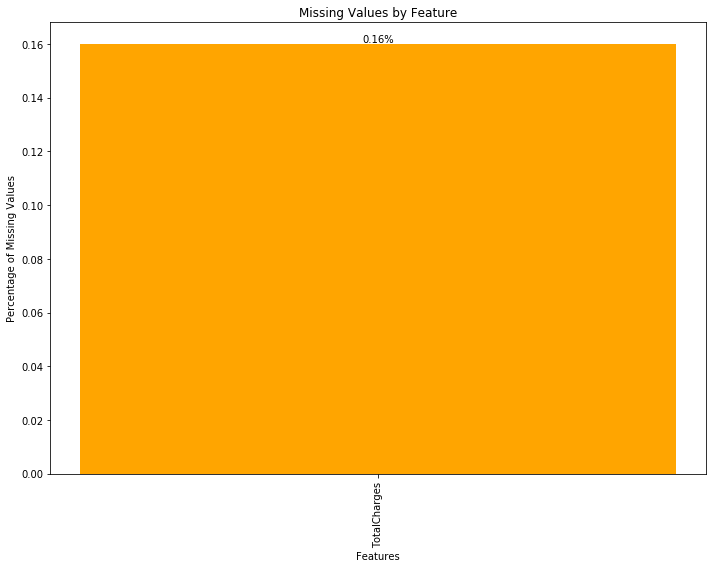

In [37]:
na_columns = missing_values_in_dff_churn(dff_churn, na_name=True, plot=True)

In [122]:
#Handling Missing Values by filling the TotalCharges Variable with median

dff_churn["TotalCharges"].fillna(dff_churn["TotalCharges"].median(), inplace=True)

In [124]:
dff_churn.isnull().sum()

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecu

#### 2. Outlier Detection.

In [144]:

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


    
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    

def check_for_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    if outliers.any(axis=None):
        if plot:
            plt.figure(figsize=(12, 8))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
            return True
        else:
            return False
    

In [136]:
    for col in num_cols:
        print(col, check_for_outlier(dff_churn, col))
        if check_outlier(dff_churn, col):
            replace_with_thresholds(dff_churn, col)

tenure False
MonthlyCharges False
TotalCharges False


# Building the Models
<hr>

In [49]:
models = [('Logistic Regression', LogisticRegression(random_state=42)),
          ('K-Nearest Neighbors', KNeighborsClassifier()),
          ('Decision Tree Classier', DecisionTreeClassifier(random_state=42)),
          ('Random Forest', RandomForestClassifier(random_state=42)),
          ('XGBoost', XGBClassifier(random_state=42)),
          ("LightGBM", LGBMClassifier(random_state=42)),
          ("MLP Classifier",  MLPClassifier(random_state=42)),
          ("CatBoost", CatBoostClassifier(verbose=False, random_state=42))]

# Performing Metrics
<hr>

In [50]:
models_metrics = []

In [162]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    
    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)
    
    models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })
    
    print(f"  %%%%%%%%%%%{name} %%%%%%%%%%%%%%%%% ")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")







C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

  %%%%%%%%%%%Logistic Regression %%%%%%%%%%%%%%%%% 
Accuracy: 0.8039
AUC: 0.8453
Recall: 0.5522
Precision: 0.6547
F1: 0.599
  %%%%%%%%%%%K-Nearest Neighbors %%%%%%%%%%%%%%%%% 
Accuracy: 0.7717
AUC: 0.7844
Recall: 0.5356
Precision: 0.575
F1: 0.5545
  %%%%%%%%%%%Decision Tree Classier %%%%%%%%%%%%%%%%% 
Accuracy: 0.727
AUC: 0.6541
Recall: 0.496
Precision: 0.4858
F1: 0.4907
  %%%%%%%%%%%Random Forest %%%%%%%%%%%%%%%%% 
Accuracy: 0.788
AUC: 0.8182
Recall: 0.4821
Precision: 0.6323
F1: 0.547
  %%%%%%%%%%%XGBoost %%%%%%%%%%%%%%%%% 
Accuracy: 0.787
AUC: 0.823
Recall: 0.5201
Precision: 0.6178
F1: 0.5646
  %%%%%%%%%%%LightGBM %%%%%%%%%%%%%%%%% 
Accuracy: nan
AUC: nan
Recall: nan
Precision: nan
F1: nan


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: cpu_count() got an unexpected keyword argument 'only_physical_cores'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached an

  %%%%%%%%%%%MLP Classifier %%%%%%%%%%%%%%%%% 
Accuracy: 0.7833
AUC: 0.8168
Recall: 0.5383
Precision: 0.6021
F1: 0.5678
  %%%%%%%%%%%CatBoost %%%%%%%%%%%%%%%%% 
Accuracy: 0.7961
AUC: 0.8392
Recall: 0.5051
Precision: 0.6499
F1: 0.5682


## Metrics Comparison of Different Models Before Feature Engineering
<hr>

In [52]:
# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "CART", "RF", "XGB", "LightGBM", "CatBoost"],
    "Accuracy": [models_metrics[0]['Accuracy'], models_metrics[1]['Accuracy'],
                 models_metrics[2]['Accuracy'], models_metrics[3]['Accuracy'],
                 models_metrics[4]['Accuracy'], models_metrics[5]['Accuracy'],
                 models_metrics[6]['Accuracy']],
    "AUC": [models_metrics[0]['AUC'], models_metrics[1]['AUC'],
            models_metrics[2]['AUC'], models_metrics[3]['AUC'],
            models_metrics[4]['AUC'], models_metrics[5]['AUC'],
            models_metrics[6]['AUC']],
    "Recall": [models_metrics[0]['Recall'], models_metrics[1]['Recall'],
               models_metrics[2]['Recall'], models_metrics[3]['Recall'],
               models_metrics[4]['Recall'], models_metrics[5]['Recall'],
               models_metrics[6]['Recall']],
    "Precision": [models_metrics[0]['Precision'], models_metrics[1]['Precision'],
                  models_metrics[2]['Precision'], models_metrics[3]['Precision'],
                  models_metrics[4]['Precision'], models_metrics[5]['Precision'],
                  models_metrics[6]['Precision']],
    "F1": [models_metrics[0]['F1'], models_metrics[1]['F1'],
           models_metrics[2]['F1'], models_metrics[3]['F1'],
           models_metrics[4]['F1'], models_metrics[5]['F1'],
           models_metrics[6]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models Before Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

IndexError: list index out of range

# Interpretability and Feature Importance

<hr>

In [53]:
models = [RandomForestClassifier(),
              XGBClassifier(),
             
              CatBoostClassifier(verbose=False, random_state=12345)
              ]

In [54]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

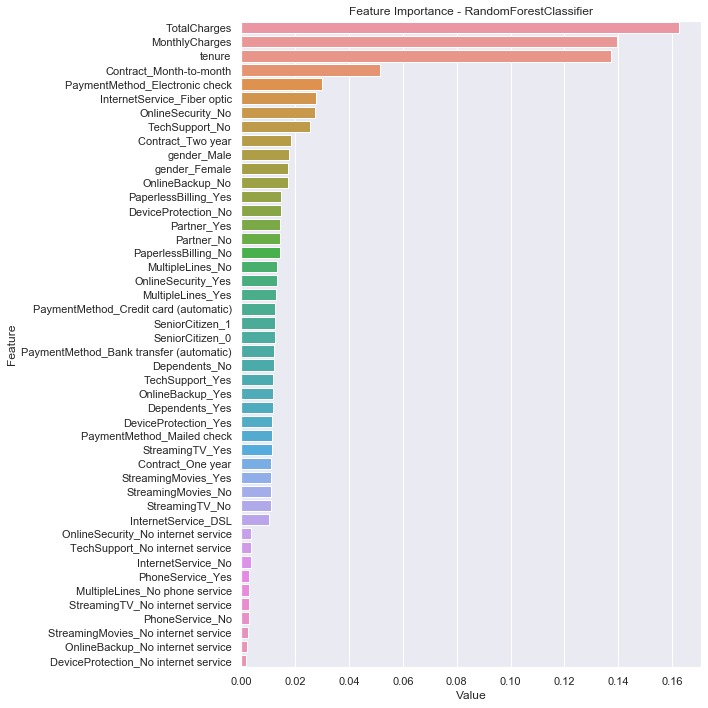

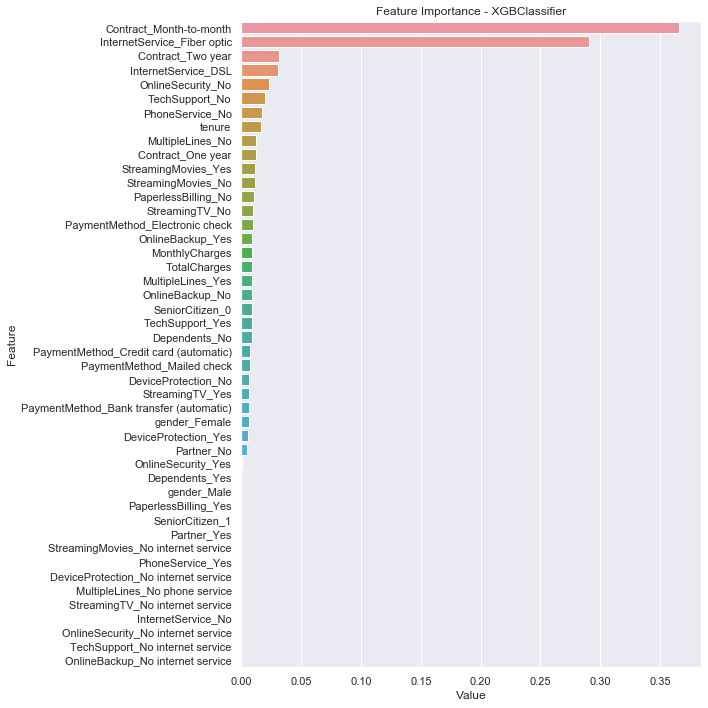

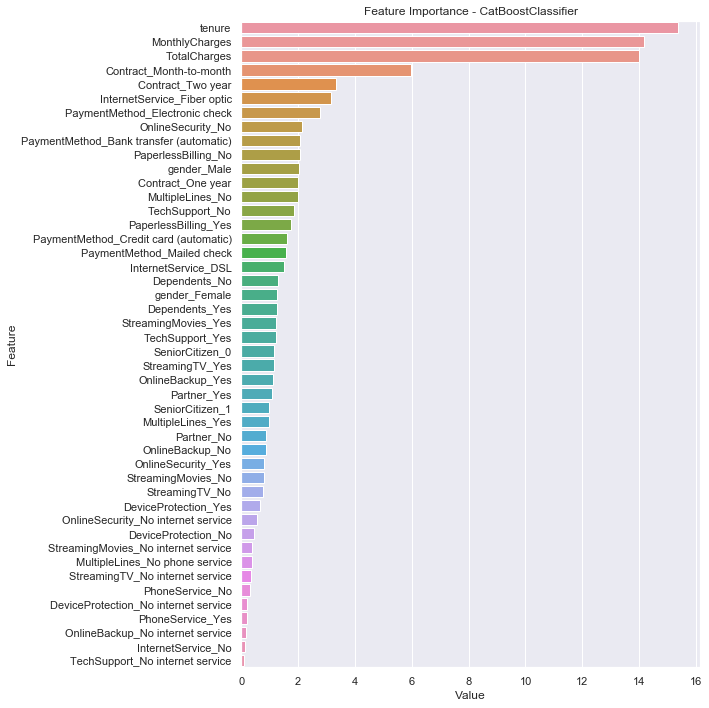

In [183]:
for model in models:
    model.fit(X, y)
    plot_importance(model, X)

#  Make Predictions With The Models
<hr>

In [129]:
model = XGBClassifier(n_estimators = 300, random_state = 123)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=123, reg_alpha=0, ...)

In [ ]:
#  list of models
models = [LogisticRegression, KNeighborsClassifier, RandomForestClassifier, DecisionTreeClassifier , XGBClassifier, MLPClassifier, CatBoostClassifier, LGBMClassifier]

# Iterate over each model and make predictions
for i, model in enumerate(models):
    y_pred = model.predict(x_train)
    print(f"Predictions from model {i+1}: {y_pred}")

# Interpretability and Feature Importance

<hr>

#### LIME (Local Interpretable Model-agnostic Explanations) to interpret the model’s predictions)

In [132]:
np.random.seed(123)
predict_fn = lambda x: model.predict_proba(x_test)
# Defining the LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(dff_churn[x_test.columns].astype(int).values,                                               mode='classification',
class_names=['Did not Churn', 'Churn'],                                                 training_labels=dff_churn['Churn'],                                                  feature_names=features.columns)
# using LIME to get the explanations
i = 5
exp=explainer.explain_instance(dff_churn.loc[i,x_test.columns].astype(int).values, predict_fn, num_features=5)
exp.show_in_notebook(show_table=True)


ValueError: invalid literal for int() with base 10: '7590-VHVEG'